In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the data from sheet1

MHealth = pd.read_csv(r"D:\00 Henotic\SRKR\Datasets\Data-01\MHealthData.csv", header=0)

# Copy 20% data (stratified split on target variable) to new dataset 

MHealth = MHealth.groupby('V24', group_keys=False).apply(lambda x: x.sample(frac=0.2))

# Display the shape

MHealth.shape

(32252, 25)

In [3]:
# Re set the index

MHealth = MHealth.reset_index(drop=True)

# Copy to back-up file

MHealth_bk = MHealth.copy()

# display information of the dataset

MHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32252 entries, 0 to 32251
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Patient_ID  32252 non-null  object 
 1   V1          32252 non-null  float64
 2   V2          32252 non-null  float64
 3   V3          32252 non-null  float64
 4   V4          32252 non-null  float64
 5   V5          32252 non-null  float64
 6   V6          32252 non-null  float64
 7   V7          32252 non-null  float64
 8   V8          32252 non-null  float64
 9   V9          32252 non-null  float64
 10  V10         32252 non-null  float64
 11  V11         32252 non-null  float64
 12  V12         32252 non-null  float64
 13  V13         32252 non-null  float64
 14  V14         32252 non-null  float64
 15  V15         32252 non-null  float64
 16  V16         32252 non-null  float64
 17  V17         32252 non-null  float64
 18  V18         32252 non-null  float64
 19  V19         32252 non-nul

In [4]:
# Identify the missing values

MHealth.isnull().sum()

Patient_ID    0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
dtype: int64

In [5]:
# Display Unique values of variables

MHealth.nunique()

Patient_ID    32252
V1            22059
V2            29705
V3            29005
V4             1122
V5             1225
V6            27215
V7            19010
V8            29727
V9             1231
V10             954
V11            1137
V12           25183
V13           24985
V14           25431
V15           28197
V16           26551
V17           27058
V18            1224
V19            1303
V20            1154
V21           27418
V22           27124
V23           27221
V24              13
dtype: int64

In [6]:
# Delete the Patient_ID

del MHealth['Patient_ID']

In [7]:
# Identify the Independent and Target variables

IndepVar = []
for col in MHealth.columns:
    if col != 'V24':
        IndepVar.append(col)

TargetVar = 'V24'

x = MHealth[IndepVar]
y = MHealth[TargetVar]

In [8]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Multi Label Decision Tree Algorithm

[[7194   17   56   38   49   45   28   26   45   36   39   35   29]
 [  22  165    0    0    0    0    0    0    0    0    0    0    0]
 [  36    0  122    0    0    0    0    0    0    0    0    0    0]
 [  32    0    0  148    0    0    0    0    0    0    0    0    0]
 [  46    0    0    0  149    0    0    0    0    0    1    0    0]
 [  45    0    0    0    0  132    0    0    2    0    0    0    0]
 [  23    0    0    0    0    0  163    0    0    0    0    0    1]
 [  20    0    0    0    0    0    0  159    4    0    0    0    0]
 [  39    0    0    0    0    2    0    1  158    0    0    0    0]
 [  27    0    0    0    0    0    0    0    0  139    0    0    0]
 [  29    0    0    0    0    0    0    0    0    0  121    5    2]
 [  20    0    0    0    0    0    0    0    0    0   14  144    1]
 [  25    0    0    0    0    0    0    0    0    0    1    5   36]]
Print Class: 0
TP=7194, FN=443, TN=1675, FP=364
Accuracy: 0.917
Precision: 0.952
Sensitivity: 0.942
F1-Score: 0.947

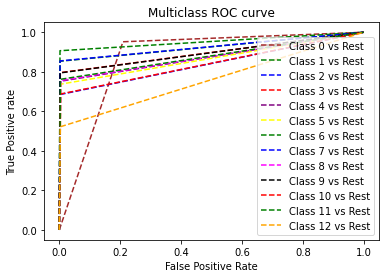

In [9]:
# To build the 'Multi Label Decision Tree' model with random sampling

from sklearn.tree import DecisionTreeClassifier

# Create an object for model

ModelDT = DecisionTreeClassifier()

# Train the model with training data

ModelDT = ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-12

lst_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);
    
    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient
    
# OVERALL - FINAL PREDICTION PERFORMANCE
   
# importing mean()
   
from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes 

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 13

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='green', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='blue', label='Class 7 vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='magenta', label='Class 8 vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='black', label='Class 9 vs Rest')
plt.plot(fpr[10], tpr[10], linestyle='--',color='red', label='Class 10 vs Rest')
plt.plot(fpr[11], tpr[11], linestyle='--',color='green', label='Class 11 vs Rest')
plt.plot(fpr[12], tpr[12], linestyle='--',color='orange', label='Class 12 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against 
# all other classes. 

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', 
                                            average='weighted'),3))
#

In [20]:
# Results

pd.set_option("display.max_rows", None)

PredResults = pd.DataFrame({'V24':lst_actual_class, 'V24_Pred':lst_predicted_class})

# Merge two Dataframes on index of both the dataframes

TestDataResults = x_test.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V24_Pred
8929,-8.9607,2.57930,-3.25210,-0.778650,-0.477240,10.14000,-8.0715,-1.208400,-0.13544,-0.741090,-0.80943,-18.07100,-51.92900,12.71300,-3.2116,-10.2690,2.14280,-0.54510,-0.75975,0.59483,-0.51932,1.92810,10.8010,0,0
27742,-10.9550,1.28300,-1.88450,0.096285,0.062794,2.96800,-10.7500,-1.705700,0.72727,0.045028,-0.15914,-12.75900,-15.46900,-1.89890,-4.0415,-10.2190,0.12448,0.63529,-0.45380,0.65733,-4.43680,5.15710,3.1088,5,0
23568,-8.6555,3.48040,-3.16040,0.083726,0.133960,-3.29170,-8.7448,-2.199300,-0.54174,-0.641650,0.35756,1.54770,-4.05220,-3.45360,-12.6410,-8.1825,0.74712,-0.93529,0.18686,-0.57759,23.30800,86.59600,98.5170,0,0
3885,-8.1670,0.26869,-3.72320,0.330720,0.368390,1.42120,-11.4760,-5.070000,0.30612,-0.874300,-0.53438,-10.43900,-7.78550,59.16100,-1.5945,-11.6160,0.35668,-0.51176,-0.83778,0.53664,-12.55300,-16.47600,27.7120,0,0
16319,-9.9449,0.77833,-0.90890,-0.108840,-0.234430,1.61660,-9.6438,-0.028527,-0.30798,-0.825520,-0.55599,-6.93520,-8.55450,2.53310,-4.1589,-9.0336,-0.35793,0.15882,-1.02460,-0.34052,-2.37500,-4.10620,-13.7250,0,0
14160,-8.6446,0.41254,3.63710,0.025118,0.037677,-0.03896,-9.6760,0.713730,-0.63265,-0.761730,0.21415,1.48420,0.90259,-1.33740,-4.0604,5.4686,3.85680,0.29804,1.01640,0.30603,0.64609,-7.20480,24.2730,0,0
8622,-8.0609,2.03630,-4.61670,-0.540030,-1.193100,1.89560,-10.2000,-0.230640,-0.14100,-0.872420,-0.51277,-15.54400,1.43980,-5.33120,-2.5431,-8.3179,3.20910,-0.33333,-0.98152,-0.15517,-3.82090,-5.07520,-21.3250,0,0
21832,-9.0539,0.67464,-1.77090,-0.531660,-0.560960,0.85169,-9.7634,-0.104650,-0.14471,-0.658540,0.68762,0.33265,-8.62720,0.94542,-11.3040,-1.9655,-0.54619,-0.76471,0.55441,0.92888,-46.93800,99.77500,-196.5200,0,0
25698,-9.8161,0.39916,0.77277,0.000000,0.025118,2.43700,-9.4497,0.572720,-0.21892,-0.872420,-0.51473,0.02610,0.36671,-0.86999,-2.9115,-9.3550,1.50100,-0.07451,-0.93634,-0.34914,-0.17610,0.34301,-2.1730,1,1
5928,-19.2930,7.05100,-14.29200,0.192570,0.226060,-9.70220,-19.2830,4.376300,0.30241,-0.759850,-0.61690,1.92700,43.10000,-22.11500,-21.1690,2.7271,-6.29070,-0.97255,0.12115,0.46983,-1.06220,-52.36400,43.8240,0,0
